# Library Imports

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

# Data Import and Extraction for Learning 

This section involves the extraction of data from relevant folders of the system and performing image resolution i.e. resizing and also creating labels for data (which is in the form of images)

In [2]:
dataset = r'C:\Users\Vaibhav Makkar\Desktop\COVID 19 Chest XRay\Data'

In [3]:
args={} # Dictionary
args['dataset']=dataset;

In [4]:
args

{'dataset': 'C:\\Users\\Vaibhav Makkar\\Desktop\\COVID 19 Chest XRay\\Data'}

In [5]:
import numpy as np
import cv2
import os
from imutils import paths

iPaths=list(paths.list_images(args['dataset']))

data=[]
labels=[]

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2] # Only Extract the labels
    img = cv2.imread(iPath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224))
    data.append(img)
    labels.append(label)

data = np.array(data)/255.0 # Normalization of data for passing into Deep neural networks
labels = np.array(labels)

In [6]:
img # Images in array form (model doesn't actually read img it reads pixel values)

array([[[65, 65, 65],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [ 9,  9,  9]],

       [[68, 68, 68],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [19, 19, 19],
        [13, 13, 13],
        [17, 17, 17]],

       [[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [27, 27, 27],
        [20, 20, 20],
        [20, 20, 20]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [7]:
img[0]

array([[ 65,  65,  65],
       [ 68,  68,  68],
       [ 66,  66,  66],
       [ 62,  62,  62],
       [106, 106, 106],
       [140, 140, 140],
       [157, 157, 157],
       [131, 131, 131],
       [121, 121, 121],
       [102, 102, 102],
       [109, 109, 109],
       [112, 112, 112],
       [105, 105, 105],
       [101, 101, 101],
       [100, 100, 100],
       [106, 106, 106],
       [110, 110, 110],
       [111, 111, 111],
       [112, 112, 112],
       [123, 123, 123],
       [135, 135, 135],
       [135, 135, 135],
       [123, 123, 123],
       [115, 115, 115],
       [ 98,  98,  98],
       [ 73,  73,  73],
       [ 75,  75,  75],
       [ 77,  77,  77],
       [ 78,  78,  78],
       [ 81,  81,  81],
       [ 85,  85,  85],
       [ 87,  87,  87],
       [ 88,  88,  88],
       [ 84,  84,  84],
       [ 90,  90,  90],
       [ 84,  84,  84],
       [ 83,  83,  83],
       [ 85,  85,  85],
       [ 84,  84,  84],
       [ 75,  75,  75],
       [ 79,  79,  79],
       [ 74,  74

In [8]:
img.shape

(224, 224, 3)

In [9]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [10]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [11]:
Cimages = os.listdir(dataset+"\\Covid")
Nimages = os.listdir(dataset+"\\Normal")

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


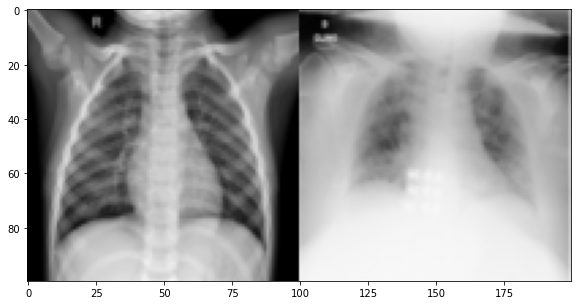

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


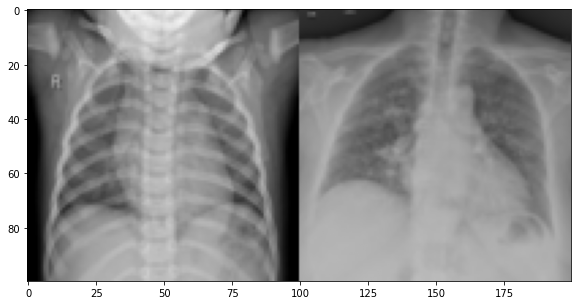

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


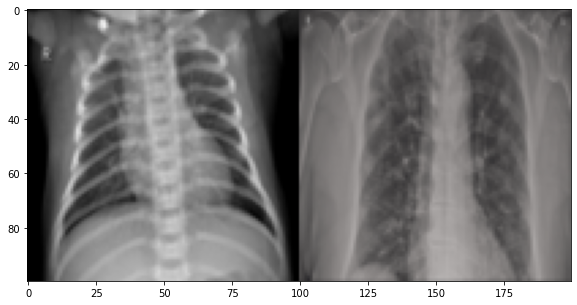

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


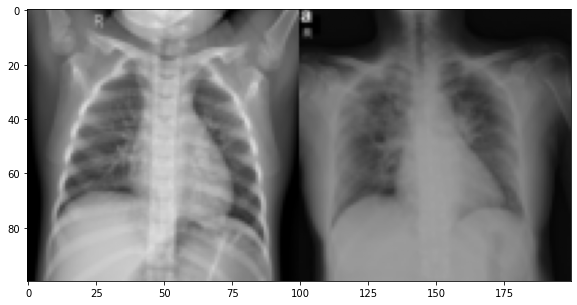

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


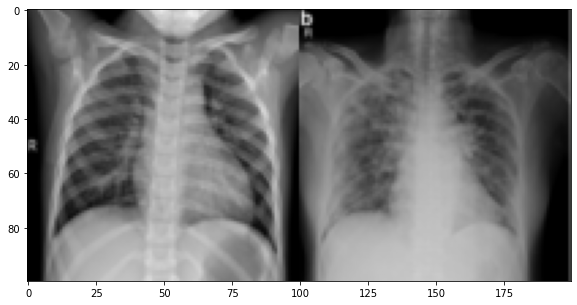

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


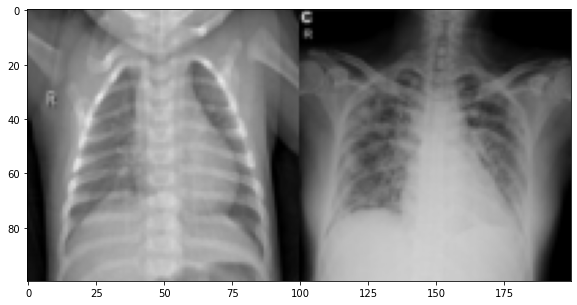

In [12]:
# Viewing sample images
import skimage 
from skimage.transform import resize
def plotter(i):
    normal = cv2.imread(dataset+"\\Normal\\"+Nimages[i])
    normal = skimage.transform.resize(normal,output_shape=(100,100))
    covid = cv2.imread(dataset+"\\Covid\\"+Cimages[i])
    covid = skimage.transform.resize(covid, mode='reflect', output_shape=(100,100,))
    pair = np.concatenate((normal,covid),axis=1)
    print("Normal Chest X-Ray Vs Covid-19 Chest X-Ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,6):
    plotter(i)

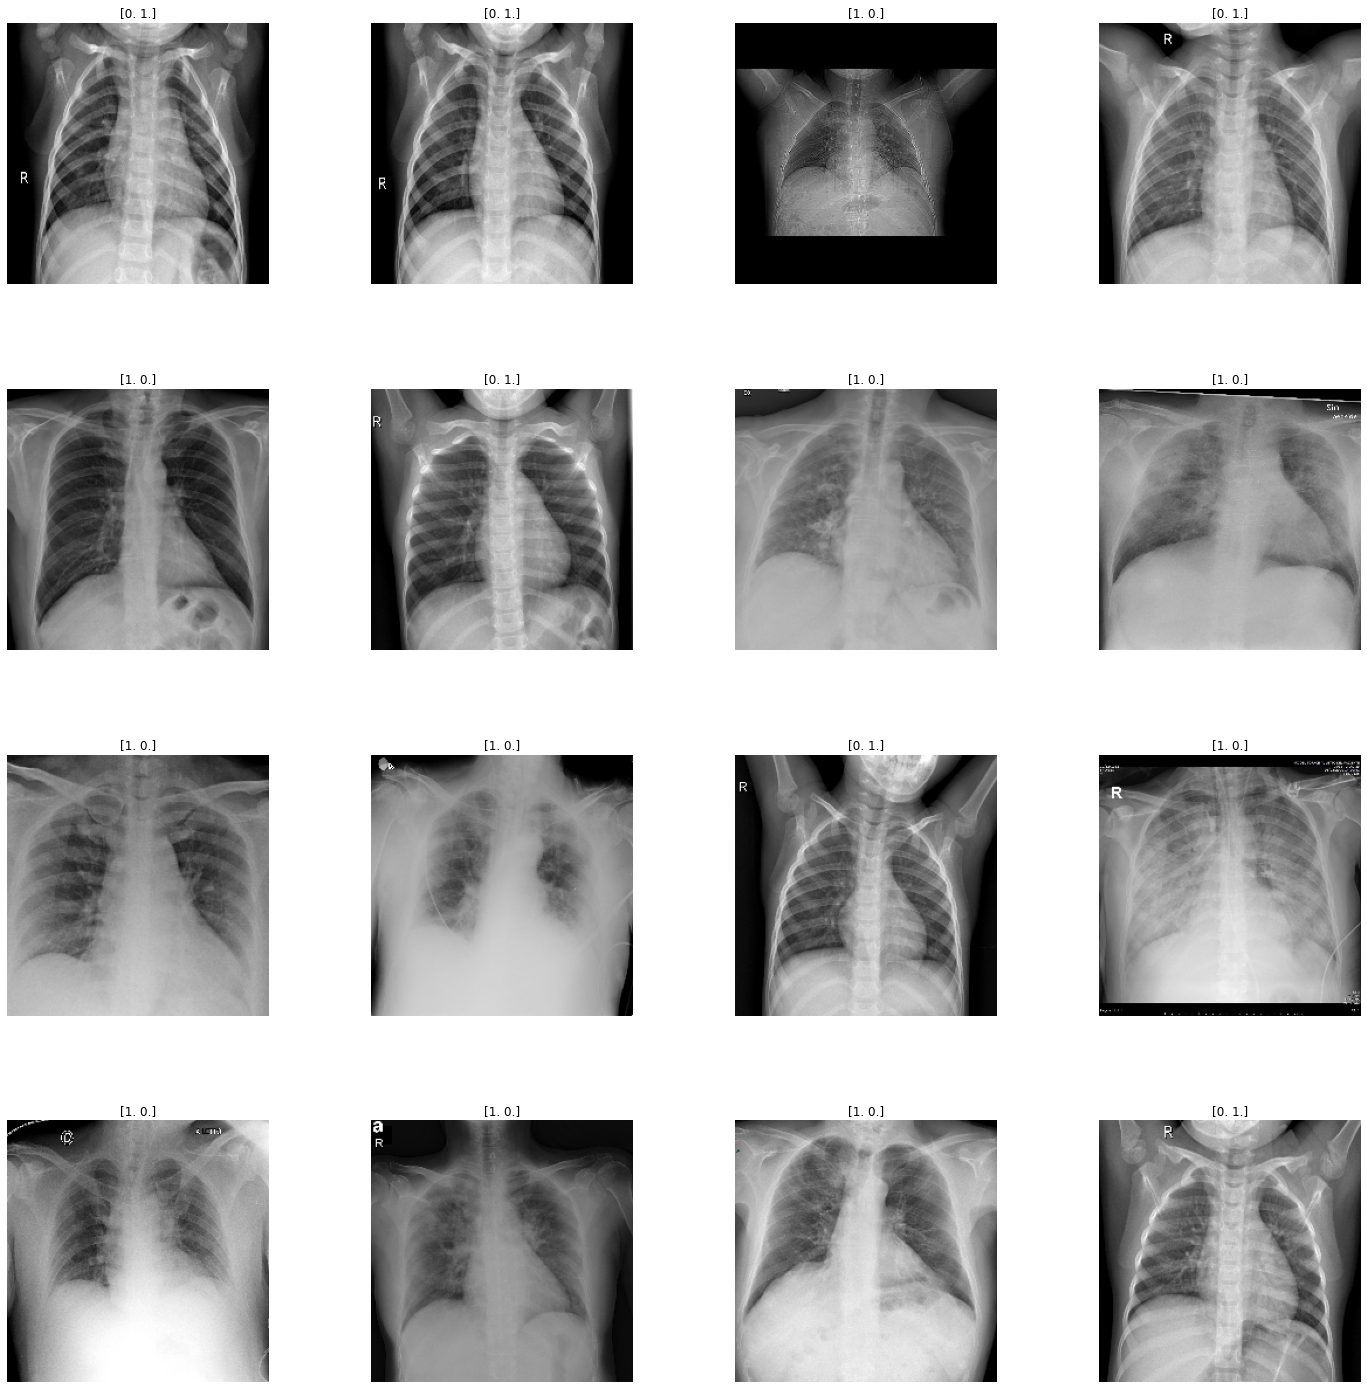

In [28]:
W_grid = 4
L_grid = 4 
fig, axes = plt.subplots(L_grid,W_grid,figsize=(25,25)) # subplots
axes = axes.ravel()
n_train = len(X_train)
for i in np.arange(0,L_grid*W_grid):
    index = np.random.randint(0,n_train)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [13]:
# Converting the labels into one hot encoding vectors
LB = LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

# Splitting the data into training and testing

In [14]:
(X_train,X_test,Y_train,Y_test) = train_test_split(data,labels,test_size=0.20,random_state=42,stratify=labels) 
# stratify maintains the ratios and random state ensures we get different data everytime we run the model

In [15]:
X_train.shape

(160, 224, 224, 3)

In [16]:
X_test.shape

(40, 224, 224, 3)

In [17]:
Y_train.shape

(160, 2)

In [18]:
Y_test.shape

(40, 2)

# Data Augmentation - Expand the training data 

Creating more images by applying different operations on a single image

In [19]:
trainAug = ImageDataGenerator(rotation_range=15,fill_mode='nearest')

In [20]:
trainAug

# Training our Convolutional Neural Network (CNN)

The approach we use is the Transfer learning approach. We use a pre-trained VGG16 model, subtract the dense layers and add our trained layers (NanoNet) along with pre-trained model i.e. fine tune our last layers to get best possible accuracy.

In [21]:
base_model = VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

58900480/58889256 [==============================] - 70s 1us/step


In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The pre-trained model acts as feature extractor and helps the fine tuning of the custom layers. 

In [23]:
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(4,4))(head_model)
# flattening converts all layers into 1-d array
head_model = Flatten(name='flatten')(head_model)
head_model = Dense(64, activation='relu')(head_model)
# Dropout prevents overfitting 
head_model = Dropout(0.5)(head_model)
# last 2 outputs
head_model = Dense(2, activation='softmax')(head_model)

model = Model(base_model.input,head_model)

In [24]:
# Preventing pretrained models from training
for layer in base_model.layers:
    layer.trainable=False

In [25]:
model.summary()
# Trainable parameters get reduced now

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [29]:
opt = Adam(learning_rate=1e-5,decay=1e-5/60)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [30]:
R=model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=1),
                     steps_per_epoch=len(X_train),
                     validation_data=(X_test,Y_test),
                     validation_steps=len(X_test),
                     epochs = 60)

C:\Users\VAIBHA~1\AppData\Local\Temp/ipykernel_12908/753490574.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R=model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=1),


Epoch 1/60
160/160 [==============================] - 39s 171ms/step - loss: 0.7250 - accuracy: 0.4688 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 2/60
160/160 [==============================] - 26s 162ms/step - loss: 0.6993 - accuracy: 0.5625 - val_loss: 0.6832 - val_accuracy: 0.5250
Epoch 3/60
160/160 [==============================] - 26s 158ms/step - loss: 0.6992 - accuracy: 0.6000 - val_loss: 0.6767 - val_accuracy: 0.5250
Epoch 4/60
160/160 [==============================] - 26s 163ms/step - loss: 0.6765 - accuracy: 0.6375 - val_loss: 0.6705 - val_accuracy: 0.5750
Epoch 5/60
160/160 [==============================] - 25s 156ms/step - loss: 0.6698 - accuracy: 0.6125 - val_loss: 0.6649 - val_accuracy: 0.7250
Epoch 6/60
160/160 [==============================] - 25s 154ms/step - loss: 0.6831 - accuracy: 0.5625 - val_loss: 0.6595 - val_accuracy: 0.7500
Epoch 7/60
160/160 [==============================] - 25s 154ms/step - loss: 0.6475 - accuracy: 0.6750 - val_loss: 0.6552 - val_ac

160/160 [==============================] - 17s 105ms/step - loss: 0.4820 - accuracy: 0.9062 - val_loss: 0.4755 - val_accuracy: 0.9500
Epoch 58/60
160/160 [==============================] - 17s 105ms/step - loss: 0.4522 - accuracy: 0.9625 - val_loss: 0.4722 - val_accuracy: 0.9500
Epoch 59/60
160/160 [==============================] - 17s 104ms/step - loss: 0.4677 - accuracy: 0.9125 - val_loss: 0.4691 - val_accuracy: 0.9750
Epoch 60/60
160/160 [==============================] - 16s 103ms/step - loss: 0.4685 - accuracy: 0.9375 - val_loss: 0.4660 - val_accuracy: 0.9500


# Making Predictions on Test data

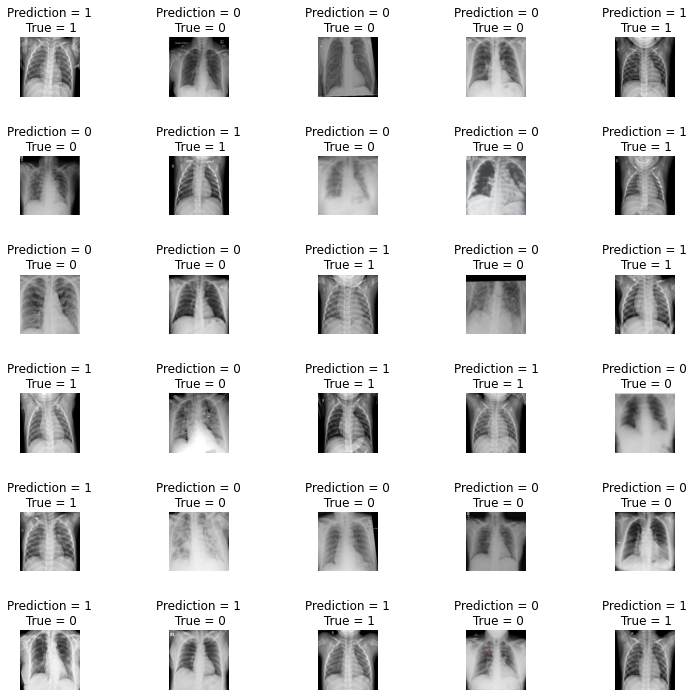

In [31]:
L = 6
W = 5
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
y_pred = model.predict(X_test,batch_size=1)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i],Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1,hspace=1)

# Accuracy metrics & plots

In [32]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test,batch_size=1)
y_pred=np.argmax(y_pred,axis=1) # Sometimes it gives fuzzy output. it chooses higher output
print(classification_report(Y_test.argmax(axis=1),y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      0.90      0.95        20
      Normal       0.91      1.00      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



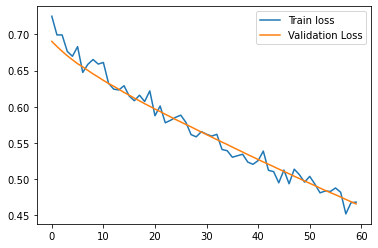

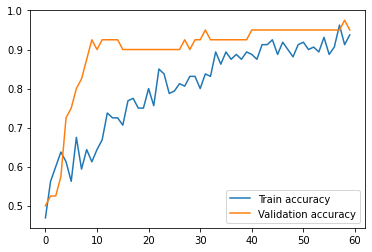

In [34]:
# Loss plot 
plt.plot(R.history['loss'], label='Train loss')
plt.plot(R.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuarcy plot
plt.plot(R.history['accuracy'], label='Train accuracy')
plt.plot(R.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

# Saving the model

In [35]:
model.save(r'C:\Users\Vaibhav Makkar\Desktop\COVID 19 Chest XRay\model.h5')